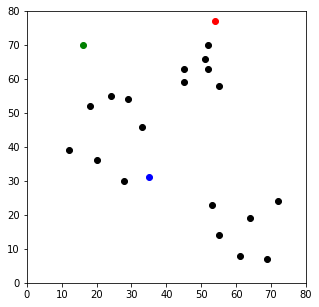

In [99]:
# print(centroids)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=3)
# kmeans.fit(df)
# np.random.seed(200)
k = 3
centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap = {1: 'r', 2:'g', 3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        56.639209        31.256999        24.351591        3     b
1  20  36        53.263496        34.234486        15.811388        3     b
2  28  30        53.712196        41.761226         7.071068        3     b
3  18  52        43.829214        18.110770        27.018512        2     g
4  29  54        33.970576        20.615528        23.769729        2     g


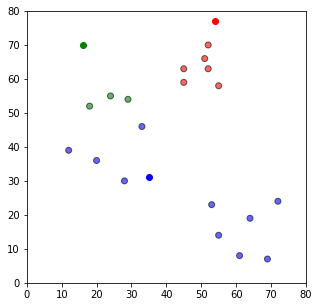

In [100]:
# Assignment stage
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt ((x1-x2)^2 + (y1-y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0])**2
                + (df['y'] - centroids[i][1])**2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
df = assignment(df,centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'], alpha=0.6, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show()
# print(centroids)

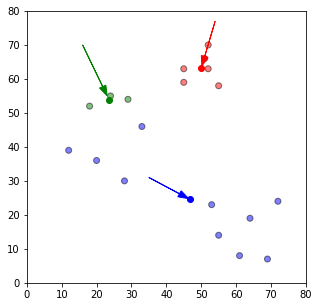

In [101]:
# Update stage
# print(centroids)
import copy
old_centroids = copy.deepcopy(centroids)
# print(old_centroids,"\n")
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])

plt.xlim(0,80)
plt.ylim(0,80)

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    # print(old_x,old_y,"\n")
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    # print(centroids[i][0],centroids[i][1],"\n")
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
    # print(dx,dy,"\n")
plt.show()

In [102]:
# repeat assignment stage - just for better understanding of 1 iteration
# df = assignment(df,centroids)

# fig = plt.figure(figsize=(5,5))
# plt.scatter(df['x'],df['y'], color=df['color'], alpha=0.6, edgecolor='k')
# for i in centroids.keys():
#     plt.scatter(*centroids[i], color = colmap[i])

# plt.xlim(0,80)
# plt.ylim(0,80)
# plt.show()

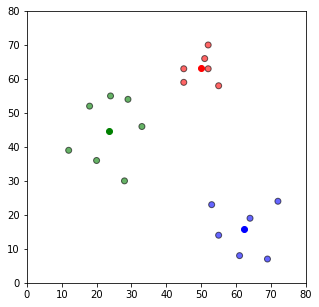

In [103]:
# continue until allassiged categories dont change
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'], alpha=0.6, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show()